In [7]:
#Imports
import numpy as np
import pandas as pd
from playsound import playsound
#This is used to show a progress bar in the terminal. Helpful as the conversion can take a while.

In [19]:
with open("./data/data.csv", "r") as file:
    data_raw = pd.read_csv(file)

data_raw.head()

,path,sentence,sentence_domain,age,gender,accents,mfcc_01_mean,mfcc_02_mean,mfcc_03_mean,mfcc_04_mean,...,spec_contrast_band_4_std,spec_contrast_band_5_std,spec_contrast_band_6_std,spec_contrast_band_7_std,spec_rolloff_mean,spec_rolloff_std,zcr_mean,zcr_std,rmse_mean,rmse_std
0,./clips/common_voice_en_40187705.mp3,Any new copies were initialized with a success...,NaN,fifties,male_masculine,Canadian English,-449.487457,119.852509,7.753420,30.211107,...,4.427589,3.374920,8.790948,4.794475,4491.619810,2971.032386,0.078209,0.080991,0.021588,0.023391
1,./clips/common_voice_en_40187697.mp3,He then led the life of a wandering hermit.,NaN,fifties,male_masculine,Canadian English,-494.584290,125.826019,18.260662,23.508959,...,4.600072,4.264892,7.531223,4.263827,4458.521793,2792.566125,0.061128,0.059886,0.016811,0.020808
2,./clips/common_voice_en_40187695.mp3,Artume appeared as a recurring character in Ma...,NaN,fifties,male_masculine,Canadian English,-503.006805,131.359589,15.189734,18.775719,...,4.263854,6.058417,6.529373,3.953812,4289.709689,2843.069699,0.067131,0.057595,0.013110,0.014007
3,./clips/common_voice_en_40187693.mp3,Cohousing cultivates a culture of sharing and ...,NaN,fifties,male_masculine,Canadian English,-466.040344,111.497826,7.834814,21.756237,...,4.760368,4.768118,6.406526,3.485832,4421.248209,2540.725526,0.072797,0.060684,0.015802,0.019355
4,./clips/common_voice_en_40187696.mp3,In practice however the resistive element vari...,NaN,fifties,male_masculine,Canadian English,-473.256073,116.954979,12.820942,26.763842,...,4.252196,4.170021,5.473282,3.982934,4656.431159,2868.399050,0.082116,0.086288,0.016562,0.018280


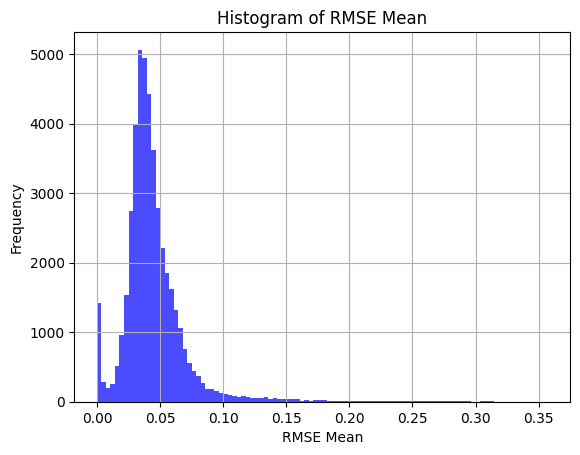

In [35]:
import matplotlib.pyplot as plt

# Create a histogram of the rmse_mean column
data_raw['rmse_mean'].hist(bins=100, color='blue', alpha=0.7)
plt.title('Histogram of RMSE Mean')
plt.xlabel('RMSE Mean')
plt.ylabel('Frequency')
plt.show()

In [50]:
low_volumn=data_raw[data_raw['rmse_mean']<0.002].sort_values(by='rmse_mean', ascending=False)
low_volumn


,path,sentence,sentence_domain,age,gender,accents,mfcc_01_mean,mfcc_02_mean,mfcc_03_mean,mfcc_04_mean,...,spec_contrast_band_4_std,spec_contrast_band_5_std,spec_contrast_band_6_std,spec_contrast_band_7_std,spec_rolloff_mean,spec_rolloff_std,zcr_mean,zcr_std,rmse_mean,rmse_std
21689,./clips/common_voice_en_41176668.mp3,Polygamy and wife beating are relatively commo...,NaN,sixties,male_masculine,Filipino,-486.747620,139.198792,-46.064625,63.234856,...,3.099087,2.179067,1.875725,1.106606,7127.455743,434.687625,0.133997,0.022660,0.001999,0.000451
43707,./clips/common_voice_en_42600423.mp3,The principle used to prove the theorem has be...,NaN,twenties,male_masculine,NaN,-613.625854,131.877853,-16.176237,26.810455,...,3.105614,2.982292,5.424224,10.162184,4228.015988,2636.621623,0.091860,0.093088,0.001999,0.001846
35493,./clips/common_voice_en_41962128.mp3,The Spanish government classified the Chinese ...,NaN,twenties,female_feminine,nigerian accent,-716.522949,72.839294,17.287014,45.900829,...,6.211145,7.486499,10.162643,4.412935,6501.122401,2995.194355,0.164689,0.139307,0.001999,0.001717
35505,./clips/common_voice_en_41962174.mp3,He is one of the pioneers of the massively mul...,NaN,twenties,female_feminine,nigerian accent,-691.644714,104.071815,14.345959,38.842327,...,6.668976,6.816640,11.111075,3.662690,5829.154728,2784.292432,0.119853,0.107923,0.001998,0.001649
21750,./clips/common_voice_en_41177237.mp3,"There is a nimbus about the head of the ""seemi...",NaN,sixties,male_masculine,Filipino,-488.901550,140.118042,-46.575390,65.586800,...,2.926392,2.114630,1.658886,1.343100,7090.070392,381.591091,0.133177,0.017917,0.001994,0.000339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8548,./clips/common_voice_en_40596976.mp3,They were released the following year.,NaN,twenties,female_feminine,NaN,-986.063782,23.168114,-14.794665,17.441271,...,3.732906,3.720020,2.769677,2.933845,9430.712670,844.435982,0.347749,0.067586,0.000015,0.000025
8733,./clips/common_voice_en_40597166.mp3,"This is the energetic ground state, or native ...",NaN,twenties,female_feminine,NaN,-1007.787231,17.810871,-14.178007,15.504548,...,3.719368,3.497147,3.071561,3.012324,9449.937500,1004.762388,0.356748,0.055456,0.000014,0.000041
8661,./clips/common_voice_en_40597096.mp3,River Plate and San Lorenzo stadiums were the ...,NaN,twenties,female_feminine,NaN,-1009.371521,17.779713,-11.768229,16.519699,...,3.300610,2.082001,2.023482,3.167454,9530.995521,771.700038,0.360509,0.064104,0.000012,0.000025
8787,./clips/common_voice_en_40597222.mp3,It is part of the Fens.,NaN,twenties,female_feminine,NaN,-992.084290,17.346247,-16.929470,17.876257,...,3.241864,3.319665,3.618502,2.979933,9556.233724,333.090604,0.359843,0.042562,0.000010,0.000013


In [51]:
for clip in low_volumn['path']:
    playsound(clip)

KeyboardInterrupt: 

In [26]:
max_rmse_std_row

path                             ./clips/common_voice_en_40596920.mp3
sentence            The attack overwhelmed the Malay Regiment, and...
sentence_domain                                                   NaN
age                                                          twenties
gender                                                female_feminine
                                          ...                        
spec_rolloff_std                                           390.545731
zcr_mean                                                     0.360199
zcr_std                                                      0.044107
rmse_mean                                                    0.000007
rmse_std                                                     0.000007
Name: 8502, Length: 94, dtype: object

In [27]:
max_rmse_mean_row = data_raw.loc[data_raw['rmse_mean'].idxmax()]
playsound(max_rmse_std_row["path"])


    Error 263 for command:
        open ./clips/common_voice_en_40596920.mp3
    The specified device is not open or is not recognized by MCI.

    Error 263 for command:
        close ./clips/common_voice_en_40596920.mp3
    The specified device is not open or is not recognized by MCI.
Failed to close the file: ./clips/common_voice_en_40596920.mp3


PlaysoundException: 
    Error 263 for command:
        open ./clips/common_voice_en_40596920.mp3
    The specified device is not open or is not recognized by MCI.